In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


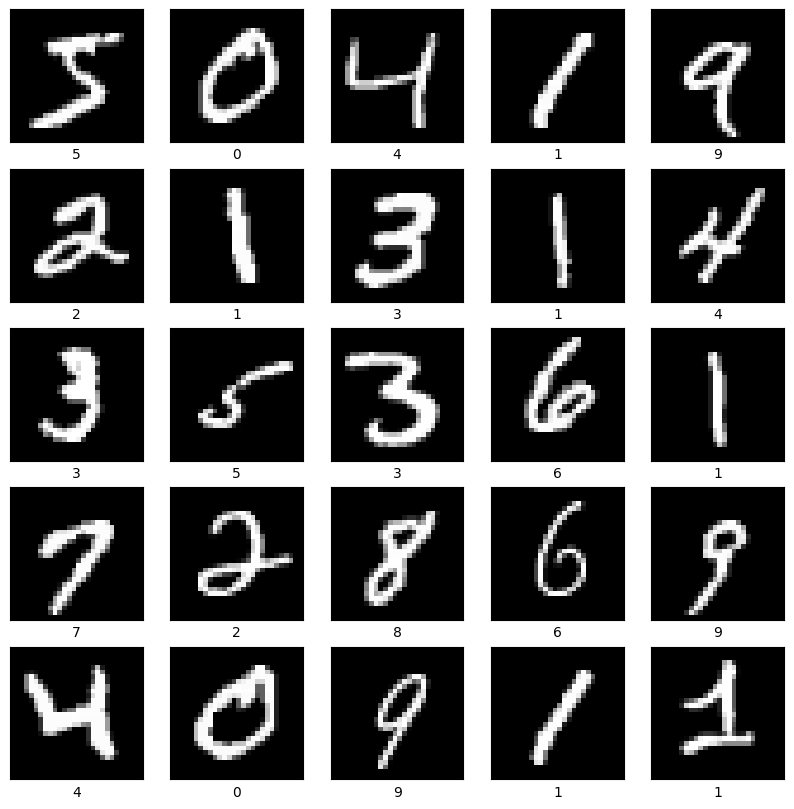

In [3]:
# prompt: normalise moi les images pour avoir les pixel de 0 et 1 et affiche les

x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Display some normalized images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_normalized[i].reshape(28, 28), cmap="gray")
    plt.xlabel(y_train[i])
plt.show()

In [5]:
# prompt: genre moi un cnn permettant de predire les chiffres

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

# Train the model
model.fit(x_train, y_train, epochs=5) # Reduced epochs for faster execution

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.8854 - loss: 1.6124
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9782 - loss: 0.0769
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9826 - loss: 0.0579
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9852 - loss: 0.0460
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9879 - loss: 0.0397
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9844 - loss: 0.0541
Test accuracy: 0.9871000051498413


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


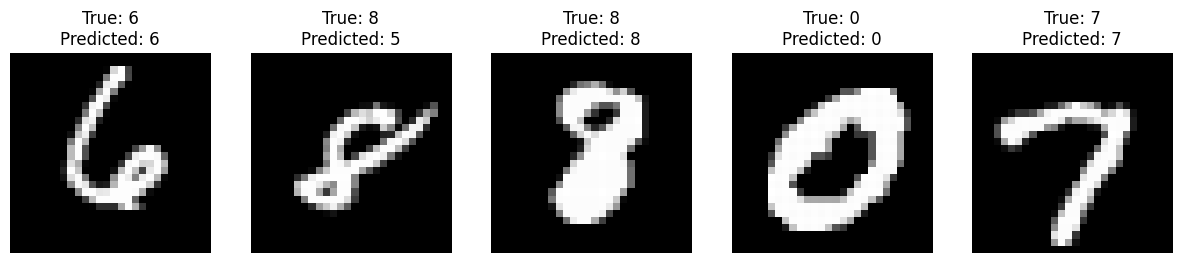

In [19]:
# prompt: prend dans les donne de test 5 images aleatoire et entre les dans le model et affiche leur images et les vrai valeur et les valeurs predite a cote de l'image

import random

# Select 5 random images from the test set
random_indices = random.sample(range(len(x_test)), 5)
random_images = x_test[random_indices]
random_labels = y_test[random_indices]

# Predict the labels for the selected images
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

# Display the images, true labels, and predicted labels
plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(random_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {random_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

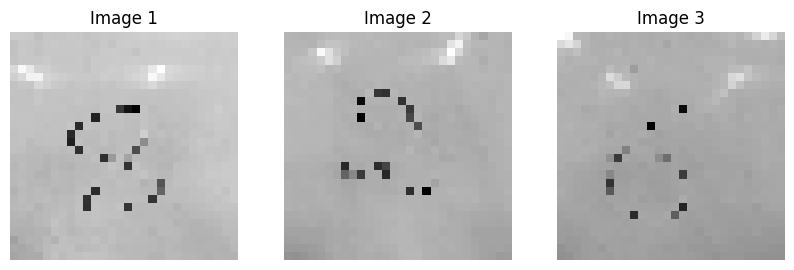

In [22]:
# prompt: import les images dont les chemin sont ("1.jpeg" et  "2.jpeg"  et 3.jpeg), converti les en niveau de gris , rescale les en 28*28  puis copies les chacune dans une variable pour que je puisse utiliser les images directement obteneues sans avoir à les réimporter, puis affiche les toutes à partir des variables dans lesquelles elles sont enregistrées

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load images and convert to grayscale
img1 = cv2.imread("1.jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("2.jpeg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("3.jpeg", cv2.IMREAD_GRAYSCALE)


# Check if images loaded correctly
if img1 is None or img2 is None or img3 is None:
    print("Error: Could not load one or more images.")
else:
    # Resize images to 28x28
    img1_resized = cv2.resize(img1, (28, 28))
    img2_resized = cv2.resize(img2, (28, 28))
    img3_resized = cv2.resize(img3, (28, 28))

    # Normalize pixel values
    img1_normalized = img1_resized / 255.0
    img2_normalized = img2_resized / 255.0
    img3_normalized = img3_resized / 255.0

    # Display images using Matplotlib
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img1_normalized, cmap='gray')
    plt.title("Image 1")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img2_normalized, cmap='gray')
    plt.title("Image 2")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img3_normalized, cmap='gray')
    plt.title("Image 3")
    plt.axis('off')

    plt.show()

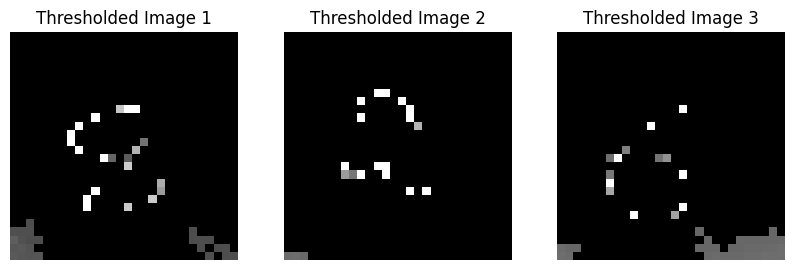

In [25]:
# prompt: récupère les images précédemment obtenues (img1_normalized,img2_normalized,img3_normalized) et  normalise les avec  la normalisation min max , transforme les en négatif, puis donne moi un seullage  pour convertir les valeur de pixel inférieure en Moi (exemple 0.4) et par exemple 0.7 pour ramener les pixels suppérieurs en blanc

import numpy as np

def normalize_minmax(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

def negative_transform(image):
    return 1 - image

def thresholding(image, lower_bound, upper_bound):
    thresholded_image = np.where(image < lower_bound, 0, np.where(image > upper_bound, 1, image))
    return thresholded_image

# Assuming img1_normalized, img2_normalized, and img3_normalized are defined
# from previous code

# Example usage for img1_normalized
img1_normalized = normalize_minmax(img1_normalized)
img1_negative = negative_transform(img1_normalized)
img1_thresholded = thresholding(img1_negative, 0.3, 0.8)

# Repeat the process for img2_normalized and img3_normalized
img2_normalized = normalize_minmax(img2_normalized)
img2_negative = negative_transform(img2_normalized)
img2_thresholded = thresholding(img2_negative, 0.4, 0.7)

img3_normalized = normalize_minmax(img3_normalized)
img3_negative = negative_transform(img3_normalized)
img3_thresholded = thresholding(img3_negative, 0.4, 0.7)


# Display the thresholded images (optional)
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1_thresholded, cmap='gray')
plt.title("Thresholded Image 1")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img2_thresholded, cmap='gray')
plt.title("Thresholded Image 2")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img3_thresholded, cmap='gray')
plt.title("Thresholded Image 3")
plt.axis('off')

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1160 - loss: 4.9047
Test accuracy: 0.11349999904632568
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


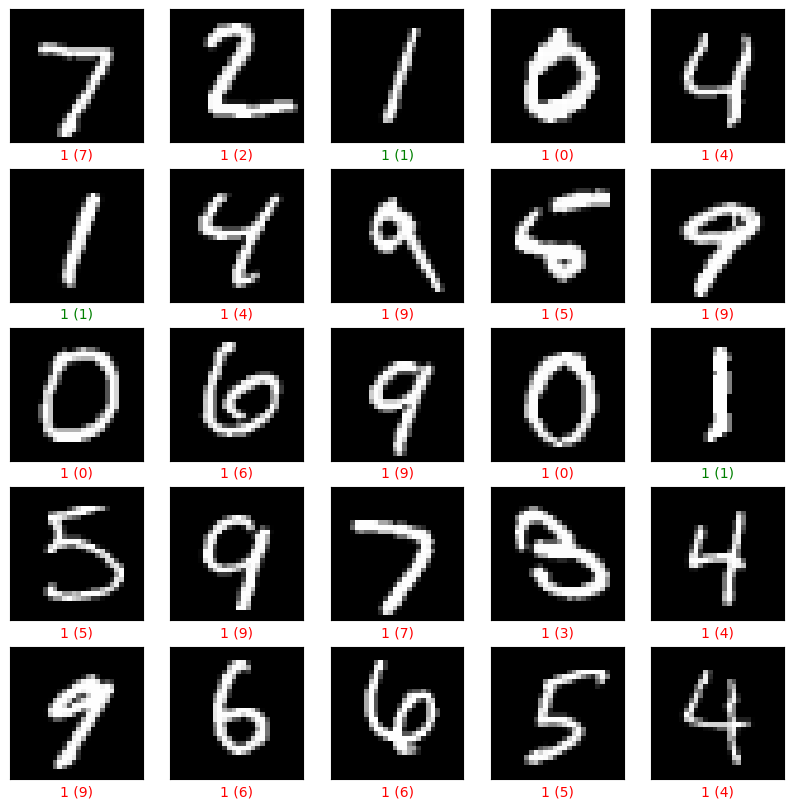

In [6]:
# prompt: affiche moi les graphique et tout ce qui faut

# ... (Your existing code)

# Evaluate the model
loss, accuracy = model.evaluate(x_test_normalized, y_test) # Use normalized test data
print('Test accuracy:', accuracy)

# Make predictions
predictions = model.predict(x_test_normalized)

# Display some predictions with images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i].reshape(28, 28), cmap="gray")
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    color = "green" if predicted_label == true_label else "red"
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

# Plot training history (if available)
# Assuming you have a history object from model.fit
# history = model.fit(...)
# if 'history' in locals():
#     plt.figure(figsize=(10,5))
#     plt.subplot(1,2,1)
#     plt.plot(history.history['accuracy'])
#     plt.plot(history.history['val_accuracy'])
#     plt.title('Model Accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')


#     plt.subplot(1,2,2)
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model Loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Validation'], loc='upper left')
#     plt.show()

In [17]:
# prompt: genere moi un code pour tester le model avec des images que je vais l'envoyer. affiche pour chaque prediction, le nombre quil a predit sur l'image

import numpy as np
from PIL import Image

def predict_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))  # Resize to 28x28
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    return predicted_digit


# Example usage (assuming you have uploaded images named 'image1.png', 'image2.png', etc.):
image_files = ['1.jpeg', '2.jpeg'] # Replace with your image file names

for image_file in image_files:
    try:
      predicted_digit = predict_image(image_file)
      print(f"The predicted digit for {image_file} is: {predicted_digit}")
    except FileNotFoundError:
      print(f"Error: Image file '{image_file}' not found.")
    except Exception as e:
      print(f"An error occurred while processing {image_file}: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The predicted digit for 1.jpeg is: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
The predicted digit for 2.jpeg is: 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted digit: 1


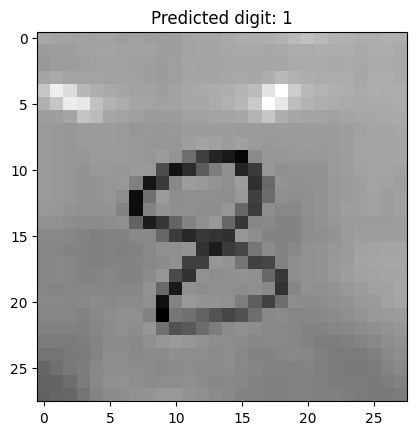

In [15]:
# prompt: genere moi un code pour tester le model avec des images que je vais l'envoyer et je precise quon doit transforme les images envoye en blancs noir avant de l'envoye au model

import numpy as np
from PIL import Image

def preprocess_image(image_path):
    try:
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Resize to 28x28
        img_array = np.array(img)
        img_array = img_array.astype('float32') / 255.0  # Normalize
        img_array = img_array.reshape(1, 28, 28, 1)  # Reshape for model input
        return img_array
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"An error occurred during preprocessing: {e}")
        return None

# Example usage (assuming 'model' is your trained model):
uploaded_image_path = "1.jpeg" # Replace with actual path

preprocessed_img = preprocess_image(uploaded_image_path)

if preprocessed_img is not None:
    prediction = model.predict(preprocessed_img)
    predicted_label = np.argmax(prediction)
    print(f"Predicted digit: {predicted_label}")

    # Display the image and prediction (optional)
    plt.imshow(preprocessed_img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted digit: {predicted_label}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


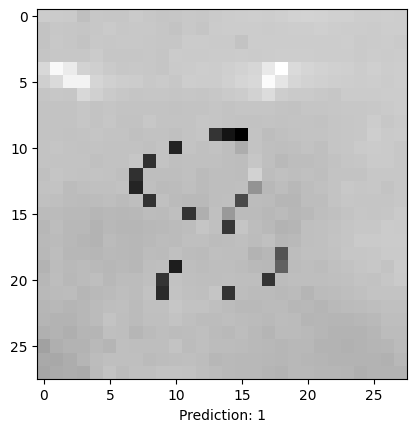

In [18]:
new_image = keras.preprocessing.image.load_img(
'1.jpeg',
target_size=(28, 28),
color_mode='grayscale'
)

new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.0
new_image = np.expand_dims(new_image, axis=0)

predictions = model.predict(new_image)

plt.imshow(new_image[0].reshape(28,28), cmap="gray")
plt.xlabel(f"Prediction: {np.argmax(predictions[0])}")

plt.show()

In [ ]:
new_image = keras.preprocessing.image.load_img(
'2.jpeg',
target_size=(28, 28),
color_mode='grayscale'
)

new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.0
new_image = np.expand_dims(new_image, axis=0)

predictions = model.predict(new_image)

plt.imshow(new_image[0].reshape(28,28), cmap="gray")
plt.xlabel(f"Prediction: {np.argmax(predictions[0])}")
plt.xlabel(predictions[0][0])
plt.show()

In [ ]:
new_image = keras.preprocessing.image.load_img(
'3.jpeg',
target_size=(28, 28),
color_mode='grayscale'
)

new_image = keras.preprocessing.image.img_to_array(new_image)
new_image = new_image / 255.0
new_image = np.expand_dims(new_image, axis=0)

predictions = model.predict(new_image)

plt.imshow(new_image[0].reshape(28,28), cmap="gray")
plt.xlabel(f"Prediction: {np.argmax(predictions[0])}")
plt.show()